In [1]:
import numpy as np

In [2]:
import time
from scipy.sparse import diags
from sklearn.datasets import load_svmlight_file
np.random.seed(11)
from time import sleep
from IPython import display
import matplotlib

import matplotlib.pyplot as plt

In [3]:
import optimization

In [4]:
import oracles

In [5]:
import plot_trajectory_2d

# Test of methods

Basic methods test

C:\Users\Andrej\1_optimiz\Lab_1\plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


CPU times: total: 31.2 ms
Wall time: 1.26 s


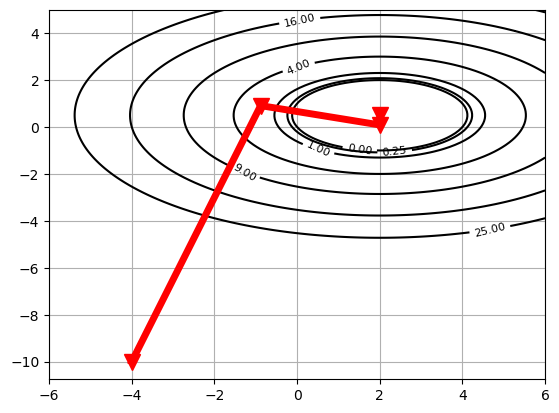

In [7]:
%%time
#oracle = oracles.QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2))
oracle = oracles.QuadraticOracle(np.array([[1,0],[0,2]]), np.array([2,1]))
[x_star, msg, history] = optimization.gradient_descent(oracle, [-4,-10], trace=True) #np.zeros(2)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])

In [8]:
history

defaultdict(list,
            {'time': [0.0,
              0.14019489288330078,
              0.14019489288330078,
              0.14019489288330078],
             'func': [array(126.),
              array(2.07352941),
              array(-2.08044983),
              array(-2.25)],
             'grad_norm': [21.840329667841555,
              2.997692307350801,
              0.823529411764703,
              0.0],
             'x': [array([ -4, -10]),
              array([-0.88235294,  0.91176471]),
              array([2.        , 0.08823529]),
              array([2. , 0.5])]})

CPU times: total: 31.2 ms
Wall time: 186 ms


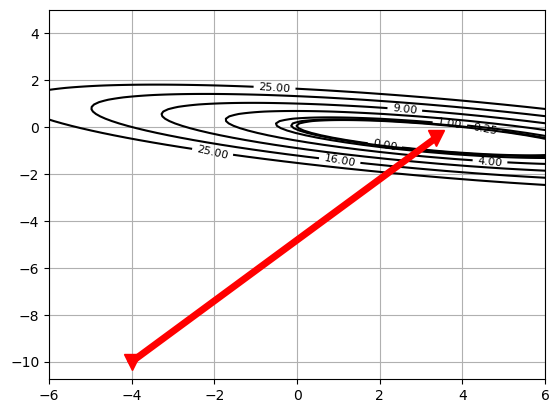

In [9]:
%%time
oracle = oracles.QuadraticOracle(np.array([[1,3],[3,20]]), np.array([2,1]))
[x_star, msg, history] = optimization.newton(oracle, [-4,-10], trace=True)#np.zeros(2)
plot_trajectory_2d.plot_levels(oracle.func)
plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])

In [10]:
history

defaultdict(list,
            {'time': [0.0, 0.13283133506774902],
             'func': [array(1146.), array(-3.13636364)],
             'grad_norm': [216.0208323287363, 1.7763568394002505e-15],
             'x': [array([ -4, -10]), array([ 3.36363636, -0.45454545])]})

LogReg L2 0racle test

In [11]:
def testLogReg():

  A = np.array([[0, 0, 1, 1], [1, 0, 1, 0]])
  b = np.array([-1, 1])
  x = np.zeros(4)
  m = np.shape(A)[0] # Количетсво наблюдений
  regcoef = 1/m

  oracle = oracles.create_log_reg_oracle(A, b, regcoef)
  print("Test: ", oracle.func(x),". Real: ", 0.6931471805599453094172321214581765680)
  print()
  print("Test: ",oracle.grad(x),". Real: ", [-0.25, 0, 0, 0.25])
  print()
  print("Test: ",oracle.hess(x),". Real: ", [[0.625, 0, 0.125, 0],[0, 0.5, 0, 0],[0.125,0, 0.75, 0.125],[0, 0, 0.125, 0.625]])

In [12]:
testLogReg()

Test:  0.6931471805599453 . Real:  0.6931471805599453

Test:  [-0.25  0.    0.    0.25] . Real:  [-0.25, 0, 0, 0.25]

Test:  [[0.625 0.    0.125 0.   ]
 [0.    0.5   0.    0.   ]
 [0.125 0.    0.75  0.125]
 [0.    0.    0.125 0.625]] . Real:  [[0.625, 0, 0.125, 0], [0, 0.5, 0, 0], [0.125, 0, 0.75, 0.125], [0, 0, 0.125, 0.625]]


In [13]:
def test_grad_finite_diff():
  # func = 0.5*(x_1^2+2*x_2^2) - (2*x_1+x_2)
  # df/dx_1 = x_1 - 2 => (x_1 = 1) = -1
  # df/dx_2 = 2*x_2 - 1 => (x_2 = 1) = 1
  # min at (2, 0.5)


  A = np.array([[1,0],[0,2]])
  b = np.array([2,1])
  x = np.array([1,1])

  oracle = oracles.QuadraticOracle(A, b)
  print("grad_finite_diff: ",oracles.grad_finite_diff(oracle.func, x))
  print("oracle.grad: ",oracle.grad(x))


In [14]:
test_grad_finite_diff()

grad_finite_diff:  [-0.99999999  0.99999999]
oracle.grad:  [-1  1]


In [15]:
def test_hess_finite_diff():
  # func = 0.5*(x_1^2+2*x_2^2) - (2*x_1+x_2)
  # d^2f/dx_1^2 = 1
  # d^2f/dx_1*dx_2 = 0
  # d^2f/dx_2^2 = 2
  # min at (2, 0.5)

  A = np.array([[1,0],[0,2]])
  b = np.array([2,1])
  x = np.array([1,1])

  oracle = oracles.QuadraticOracle(A, b)
  print("hess_finite_diff: ",oracles.hess_finite_diff(oracle.func, x))
  print("oracle.hess: ",oracle.hess(x))

In [16]:
test_hess_finite_diff()

hess_finite_diff:  [[1.00000008 0.        ]
 [0.         2.00000017]]
oracle.hess:  [[1 0]
 [0 2]]


# Experements

In [19]:
#%matplotlib inline
def experiment_1():
    np.random.seed(11)
    A_low_cond = np.array([
        [1, 0.3],
        [0.3, 1.3]
    ])
    A_high_cond = np.array([
        [0.1, 0.1],
        [0.1, 1.5]
    ])

    for i, A in enumerate([A_low_cond, A_high_cond]):
      cond = np.linalg.cond(A)
      oracle  = oracles.QuadraticOracle(A, np.zeros(2))

      x_start_arr = [np.random.uniform(-8, 8, size=2) for _ in range(3)]

      for method in ['Wolfe', 'Armijo', 'Constant']:
        for j in range(len(x_start_arr)):
          x_0 = x_start_arr[j]
          [x_star, msg, history] = optimization.gradient_descent(oracle, x_0,
                                                    line_search_options={'method' : method},
                                                    trace=True)
          plt.figure()
          plot_trajectory_2d.plot_levels(oracle.func)
          plot_trajectory_2d.plot_trajectory(oracle.func, history['x'])
          plt.show()
          print('Обусловленность = {}, j = {}, Метод = {}, Шагов = {}, x_0 = {}'.format(round(cond,3), j, method, len(history['x']), x_0))

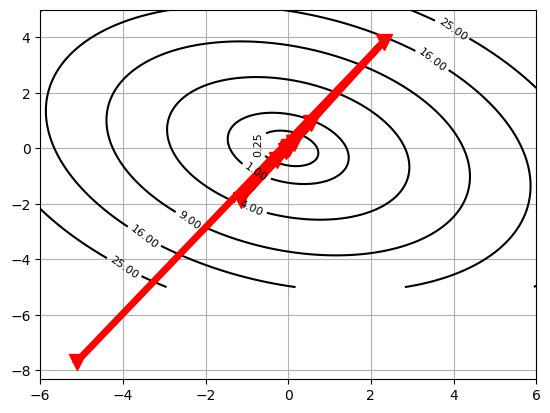

Обусловленность = 1.824, j = 0, Метод = Wolfe, Шагов = 10, x_0 = [-5.11568498 -7.68839614]


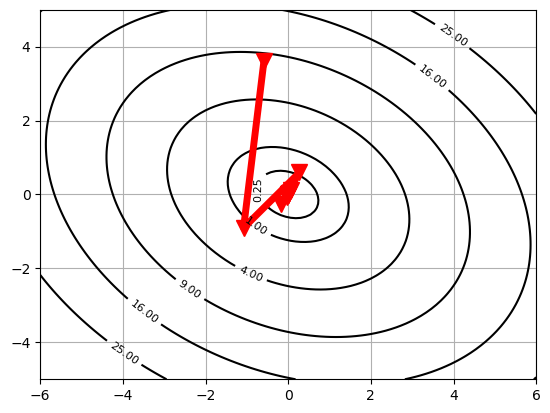

Обусловленность = 1.824, j = 1, Метод = Wolfe, Шагов = 12, x_0 = [-0.58850358  3.59894287]


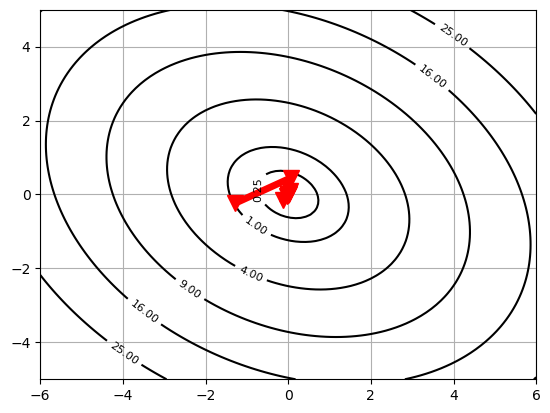

Обусловленность = 1.824, j = 2, Метод = Wolfe, Шагов = 10, x_0 = [-1.27674233 -0.23316643]


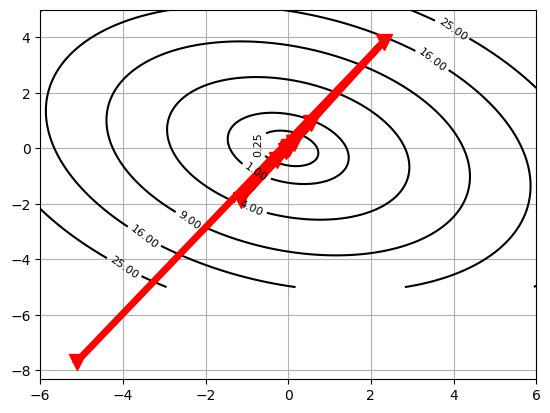

Обусловленность = 1.824, j = 0, Метод = Armijo, Шагов = 10, x_0 = [-5.11568498 -7.68839614]


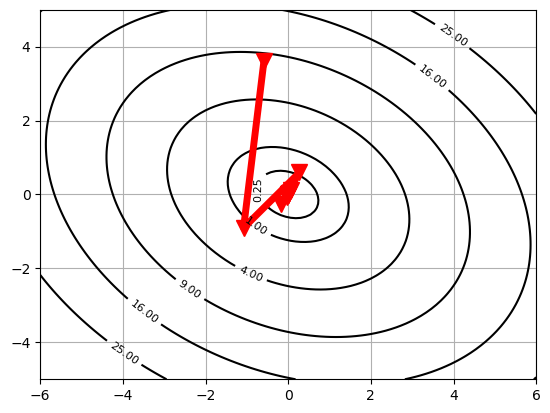

Обусловленность = 1.824, j = 1, Метод = Armijo, Шагов = 12, x_0 = [-0.58850358  3.59894287]


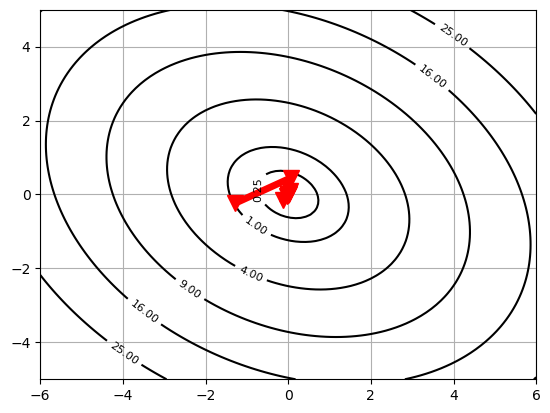

Обусловленность = 1.824, j = 2, Метод = Armijo, Шагов = 10, x_0 = [-1.27674233 -0.23316643]


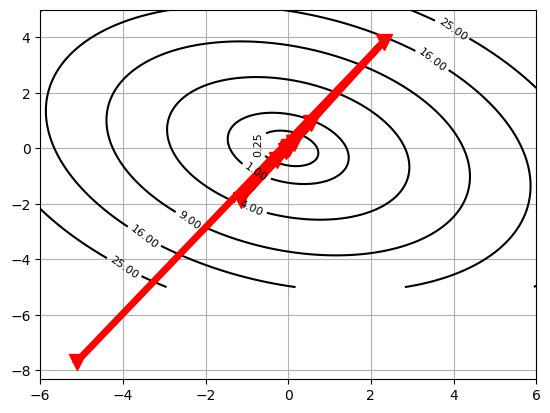

Обусловленность = 1.824, j = 0, Метод = Constant, Шагов = 10, x_0 = [-5.11568498 -7.68839614]


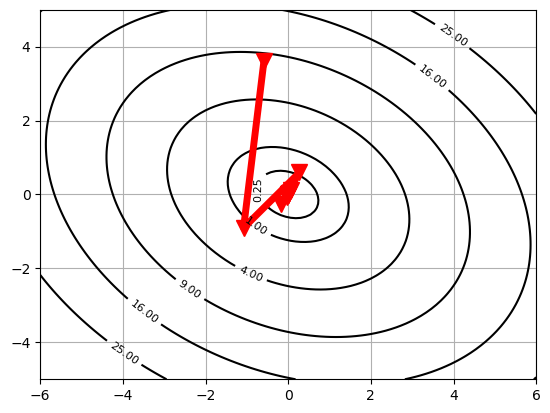

Обусловленность = 1.824, j = 1, Метод = Constant, Шагов = 12, x_0 = [-0.58850358  3.59894287]


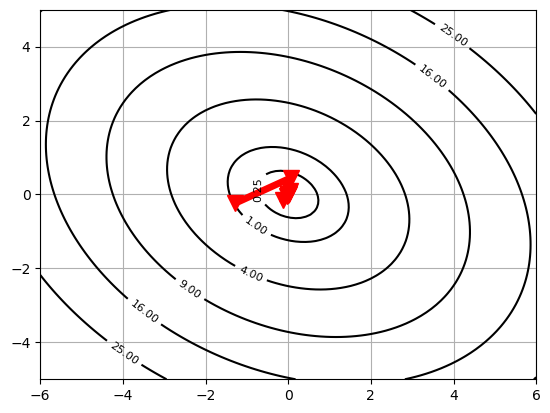

Обусловленность = 1.824, j = 2, Метод = Constant, Шагов = 10, x_0 = [-1.27674233 -0.23316643]


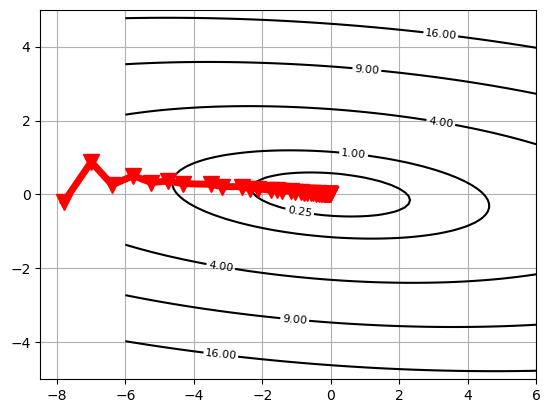

Обусловленность = 16.224, j = 0, Метод = Wolfe, Шагов = 44, x_0 = [-7.79550697 -0.20205428]


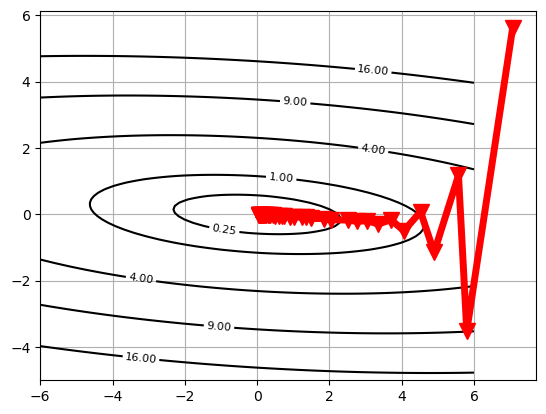

Обусловленность = 16.224, j = 1, Метод = Wolfe, Шагов = 40, x_0 = [7.06890644 5.61272143]


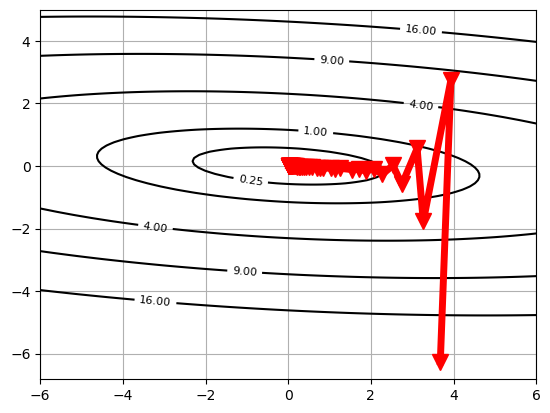

Обусловленность = 16.224, j = 2, Метод = Wolfe, Шагов = 48, x_0 = [ 3.67943152 -6.26022285]


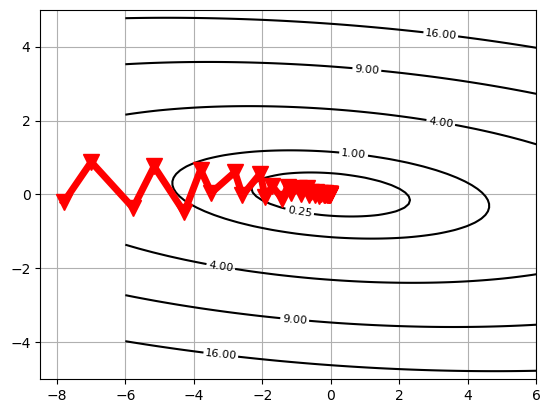

Обусловленность = 16.224, j = 0, Метод = Armijo, Шагов = 45, x_0 = [-7.79550697 -0.20205428]


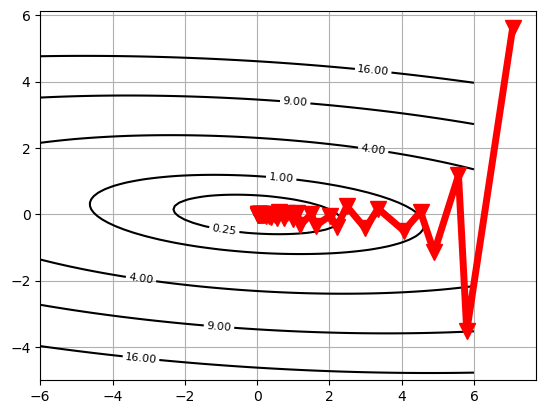

Обусловленность = 16.224, j = 1, Метод = Armijo, Шагов = 44, x_0 = [7.06890644 5.61272143]


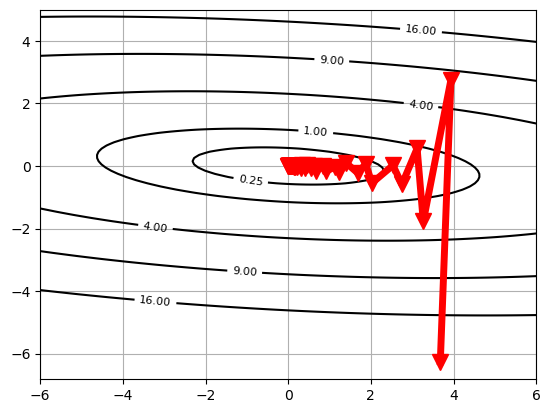

Обусловленность = 16.224, j = 2, Метод = Armijo, Шагов = 50, x_0 = [ 3.67943152 -6.26022285]


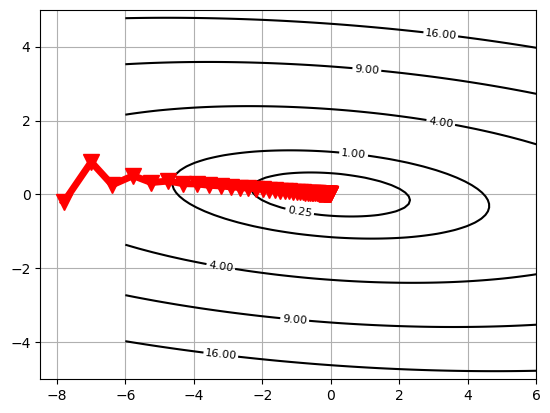

Обусловленность = 16.224, j = 0, Метод = Constant, Шагов = 59, x_0 = [-7.79550697 -0.20205428]


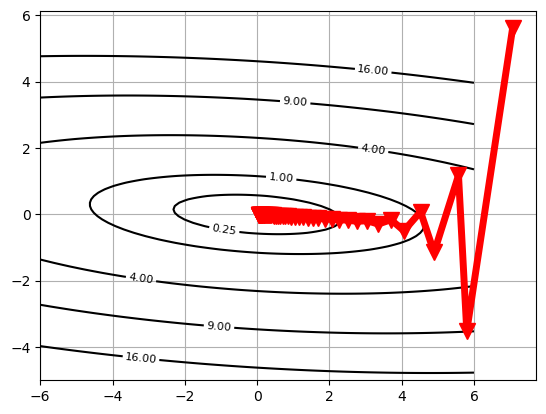

Обусловленность = 16.224, j = 1, Метод = Constant, Шагов = 53, x_0 = [7.06890644 5.61272143]


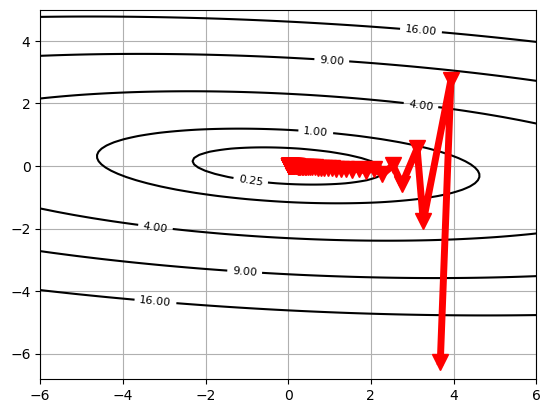

Обусловленность = 16.224, j = 2, Метод = Constant, Шагов = 65, x_0 = [ 3.67943152 -6.26022285]


In [20]:
experiment_1()

Число обусловленности матрицы о тличается в 9 раз

In [35]:
def experiment_2():
  np.random.seed(11)
  ns_arr = [10, 100, 1000, 10000]
  colors = ['r', 'b', 'g', 'm']
    
  k_arr = list(range(1, 1000, 100))
  iters_for_k = 3

  T = {}

  for n, color in zip(ns_arr, colors):
    T[n] = [[] for _ in range(iters_for_k)]
    for i in range(iters_for_k):
      for k in k_arr:
          diag = np.random.uniform(low=1, high=k, size=n)
          diag[0], diag[-1] = 1, k
          A = diags(diag)
          b = np.random.uniform(low=1, high=k, size=n)
          oracle = oracles.QuadraticOracle(A, b)
          x_star, msg, history = optimization.gradient_descent(oracle, np.zeros(n),line_search_options={'method': 'Armijo'},
                                                                trace=True)
          T[n][i].append(len(history['grad_norm']))

      plt.plot(k_arr, T[n][i], ls='dashdot', color=color, alpha=0.3)

    plt.plot(k_arr, np.mean(T[n], axis=0), color=color, label='n = {}'.format(n))

  plt.grid()
  plt.legend()
  plt.ylabel('iterations')
  plt.xlabel('k')
  plt.show()

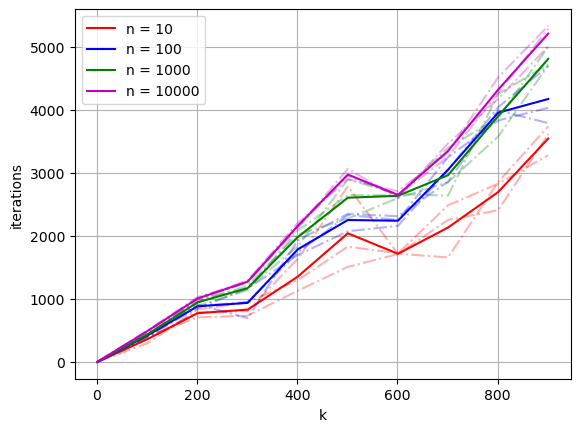

In [36]:
experiment_2()

In [25]:
def experiment_3_w8a():
    data_path = 'C:/Users/Andrej/1_optimiz/Lab_1/datasets/'
    dataSetName = 'w8a.txt'
    def plotting(history_gradient_descent, history_newton, param):
        f_gradient_descent = np.array(history_gradient_descent[param])
        f_newton = np.array(history_newton[param])

        time_gradient_descent = list(history_gradient_descent['time'])
        time_newton = list(history_newton['time'])
        if param == 'grad_norm':
            f_gradient_descent = np.log(f_gradient_descent / f_gradient_descent[0])
            f_newton = np.log(f_newton / f_newton[0])
        plt.figure()
        plt.plot(time_gradient_descent, f_gradient_descent, label='Gradient descent')
        plt.plot(time_newton, f_newton, label='Newton')
        plt.xlabel('seconds')
        plt.ylabel('func' if param == 'func' else 'log(norm(grad)/norm(grad_0))')
        plt.legend()
        plt.grid()
        plt.show()
        print(param)

    A, b = load_svmlight_file(data_path + dataSetName)
    m, n = A.shape
    oracle = oracles.create_log_reg_oracle(A, b, 1 /m)
    print(dataSetName)
    x_star_newton, _, history_newton = optimization.newton(oracle, np.zeros(n), tolerance=1e-9,line_search_options={'method' : 'Wolfe'}, trace=True)
    x_star_GD, _, history_GD = optimization.gradient_descent(oracle, np.zeros(n),line_search_options={'method' : 'Wolfe'}, trace=True)
    plotting(history_GD, history_newton, 'func')
    plotting(history_GD, history_newton, 'grad_norm')

w8a.txt


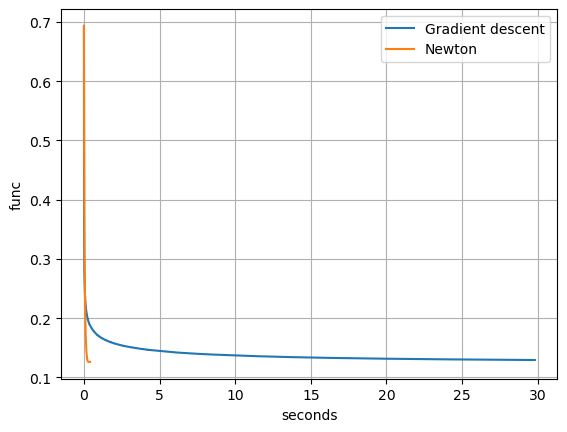

func


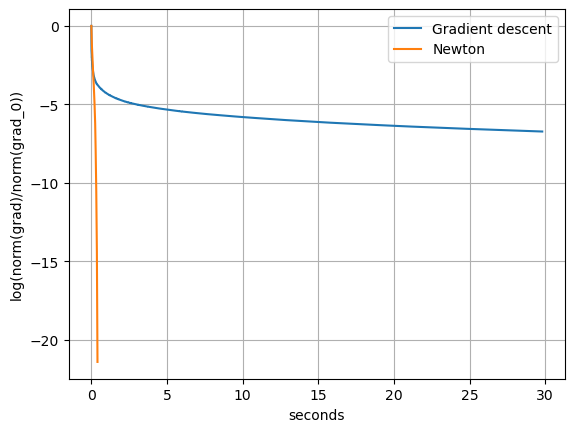

grad_norm
CPU times: total: 22.9 s
Wall time: 30.6 s


In [26]:
%%time
experiment_3_w8a()

In [16]:
def experiment_3_gisette_scale():
    data_path = 'C:/Users/Andrej/1_optimiz/Lab_1/datasets/'
    dataSetName = 'gisette_scale'
    def plotting(history_gradient_descent, history_newton, param):
        f_gradient_descent = np.array(history_gradient_descent[param])
        f_newton = np.array(history_newton[param])

        time_gradient_descent = list(history_gradient_descent['time'])
        time_newton = list(history_newton['time'])
        if param == 'grad_norm':
            f_gradient_descent = np.log(f_gradient_descent / f_gradient_descent[0])
            f_newton = np.log(f_newton / f_newton[0])
        plt.figure()
        plt.plot(time_gradient_descent, f_gradient_descent, label='Gradient descent')
        plt.plot(time_newton, f_newton, label='Newton')
        plt.xlabel('seconds')
        plt.ylabel('func' if param == 'func' else 'log(norm(grad)/norm(grad_0))')
        plt.legend()
        plt.grid()
        plt.show()
        print(param)

    A, b = load_svmlight_file(data_path + dataSetName)
    m, n = A.shape
    oracle = oracles.create_log_reg_oracle(A, b, 1 /m)
    print(dataSetName)
    x_star_nm, _, history_nm = optimization.newton(oracle, np.zeros(n), tolerance=1e-9, trace=True)
    x_star_gd, _, history_gd = optimization.gradient_descent(oracle, np.zeros(n), trace=True)
    plotting(history_gd, history_nm, 'func')
    plotting(history_gd, history_nm, 'grad_norm')

gisette_scale


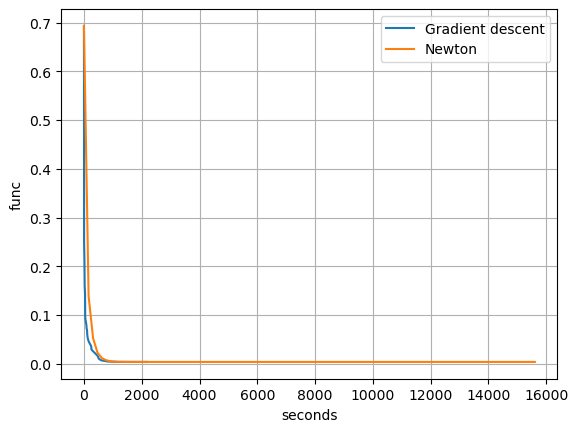

func


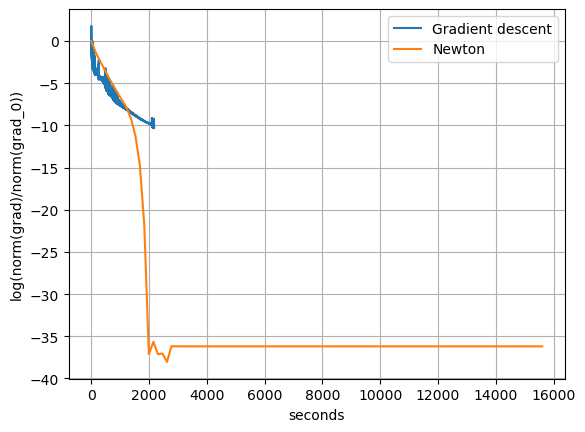

grad_norm
CPU times: total: 4h 14min 34s
Wall time: 4h 59min 5s


In [17]:
%%time
experiment_3_gisette_scale()

In [31]:
def experiment_3_real_sim():
    data_path = 'C:/Users/Andrej/1_optimiz/Lab_1/datasets/'
    dataSetName = 'real-sim'
    def plotting(history_gradient_descent, history_newton, param):
        f_gradient_descent = np.array(history_gradient_descent[param])
        f_newton = np.array(history_newton[param])
#['Wolfe', 'Armijo', 'Constant']
        time_gradient_descent = list(history_gradient_descent['time'])
        time_newton = list(history_newton['time'])
        if param == 'grad_norm':
            f_gradient_descent = np.log(f_gradient_descent / f_gradient_descent[0])
            f_newton = np.log(f_newton / f_newton[0])
        plt.figure()
        plt.plot(time_gradient_descent, f_gradient_descent, label='Gradient descent')
        plt.plot(time_newton, f_newton, label='Newton')
        plt.xlabel('seconds')
        plt.ylabel('func' if param == 'func' else 'log(norm(grad)/norm(grad_0))')
        plt.legend()
        plt.grid()
        plt.show()
        print(param)

    A, b = load_svmlight_file(data_path + dataSetName)
    m, n = A.shape
    oracle = oracles.create_log_reg_oracle(A, b, 1 /m)
    print(dataSetName)
    x_star_nm, _, history_nm = optimization.newton(oracle, np.zeros(n), line_search_options={'method' : 'Constant'}, tolerance=1e-9, trace=True)
    x_star_gd, _, history_gd = optimization.gradient_descent(oracle, np.zeros(n), line_search_options={'method' : 'Constant'}, trace=True)
    plotting(history_gd, history_nm, 'func')
    plotting(history_gd, history_nm, 'grad_norm')

real-sim


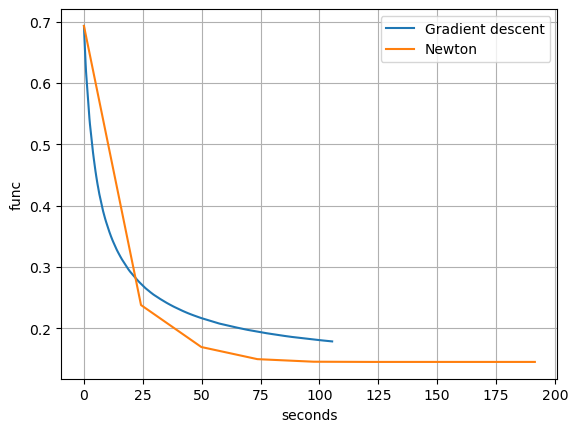

func


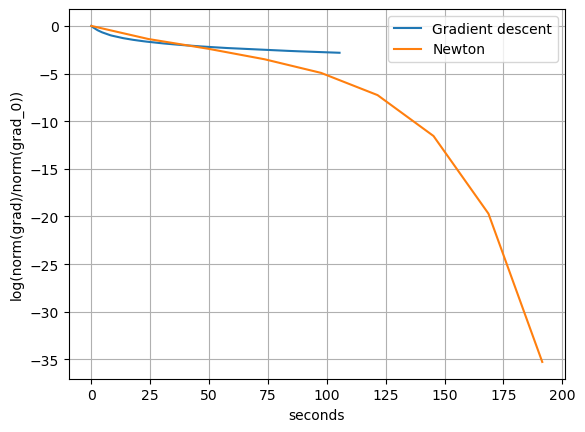

grad_norm
CPU times: total: 11min 57s
Wall time: 4min 59s


In [32]:
%%time
experiment_3_real_sim()

In [8]:
def experiment_4_quadratic():
  ####Quadratic Gradient descent
  np.random.seed(11)
  k = 500
  n = 20

  diag = np.random.uniform(low=1, high = k, size=n)
  diag[0], diag[-1] = 1, k
  A = diags(diag)
  b = np.random.uniform(low=k, high = 2*k, size=n)

  oracle = oracles.QuadraticOracle(A, b)

  methodsArr = ['Wolfe', 'Armijo', 'Constant']

  methodsIters = [np.arange(0.1,1,0.1),np.arange(0.1,1,0.1),np.arange(0.001,0.01,0.001)]

  for index, item in enumerate(methodsArr):
    print(item)
    plt.figure(figsize=(10,6))
    for i in methodsIters[index]:
      #print(i)
      _, _, history = optimization.gradient_descent(oracle, np.zeros(n)- 1,
                                        line_search_options={'method': item,
                                        'c': i,
                                        'c1': i if item == 'Armijo' else i*0.5,
                                        'c2': i },
                                        trace=True)
      Iters = np.arange(len(history['func']))
      func = history['func']

      plt.plot(Iters, np.log(np.divide(func + np.absolute(np.min(func)),
                                      np.absolute(func[0])) + 1), label='{}.param={}'.format(item,i))
    plt.xlabel('iterations')
    ylabel = 'log((func+abs(min(func))) / abs(func_0))'
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()
    plt.clf()

Wolfe


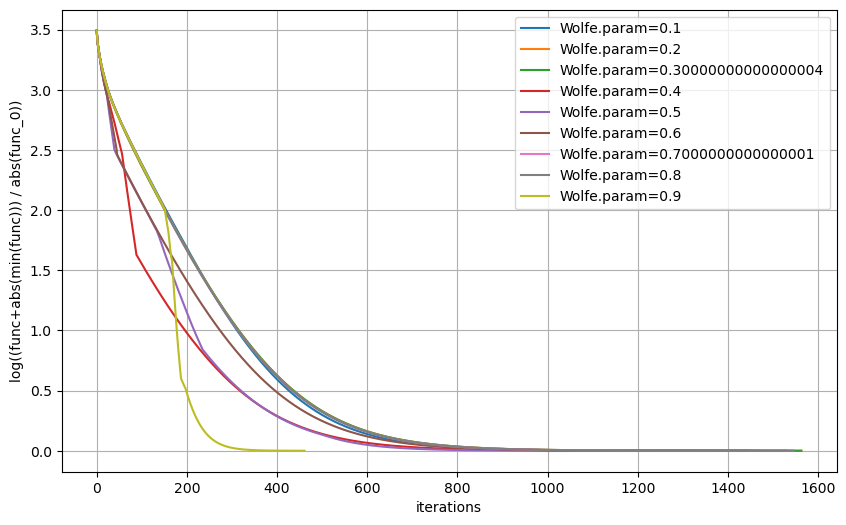

Armijo


<Figure size 640x480 with 0 Axes>

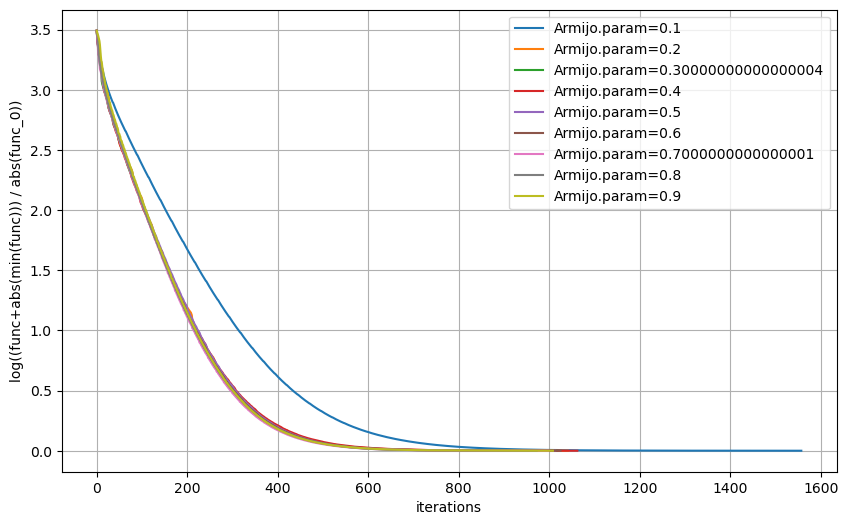

Constant


<Figure size 640x480 with 0 Axes>

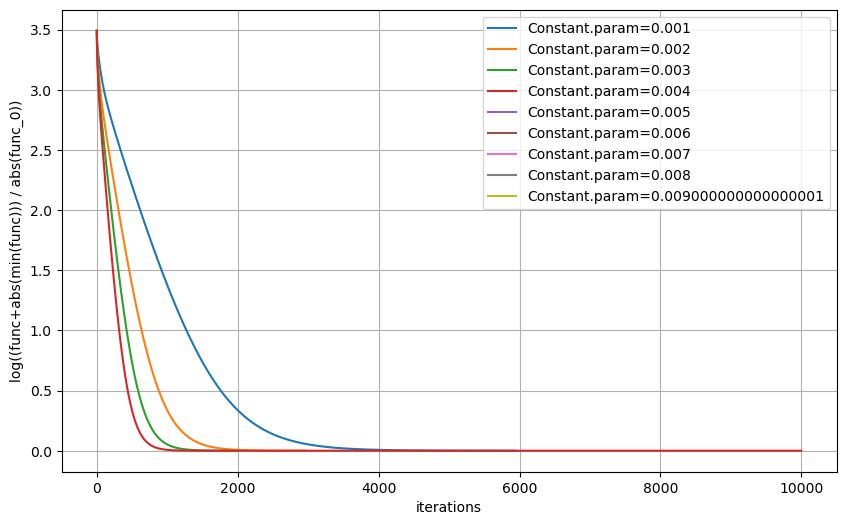

<Figure size 640x480 with 0 Axes>

In [9]:
experiment_4_quadratic()

In [47]:
def experiment_4_LogReg():
  #### LogReg Gradient descent

  np.random.seed(11)
  m = 1000
  n = 20


  A = np.random.uniform(low=-1, high = 1, size=n*m).reshape((m,n))
  b = (2*np.random.randint(2, size=m) - 1)

  oracle = oracles.create_log_reg_oracle(A, b, 1 /m)

  methodsArr = ['Wolfe', 'Armijo', 'Constant']

  methodsIters = [np.arange(0.1,1,0.1),np.arange(0.1,1,0.1),np.arange(0.1,1,0.1)]

  for index, item in enumerate(methodsArr):
    print(item)
    plt.figure(figsize=(10,6))
    for i in methodsIters[index]:
      #print(i)
      _, _, history = optimization.gradient_descent(oracle, np.zeros(n)- 1,
                                        line_search_options={'method': item,
                                        'c': i,
                                        'c1': i if item == 'Armijo' else i*0.5,
                                        'c2': i },
                                        trace=True)
      Iters = np.arange(len(history['grad_norm']))
      grad = history['grad_norm']

      plt.plot(Iters, np.divide(np.power(grad, 2), grad[0]**2), label='{}.param={}'.format(item,i))

    plt.xlabel('iterations')
    ylabel = 'grad^2/grad_0^2'
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()
    plt.clf()

Wolfe


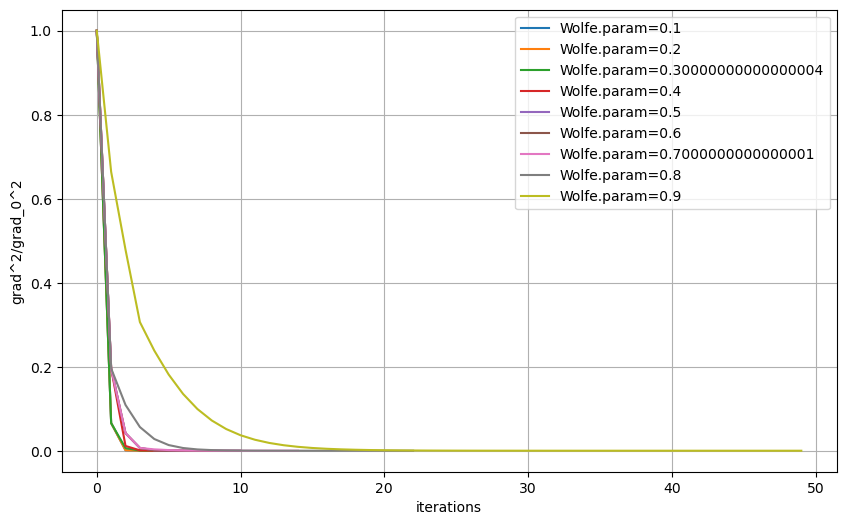

Armijo


<Figure size 640x480 with 0 Axes>

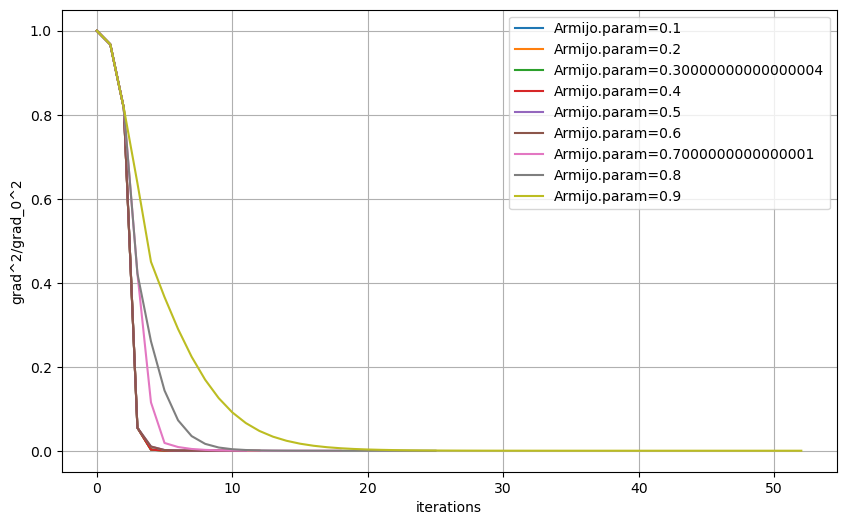

Constant


<Figure size 640x480 with 0 Axes>

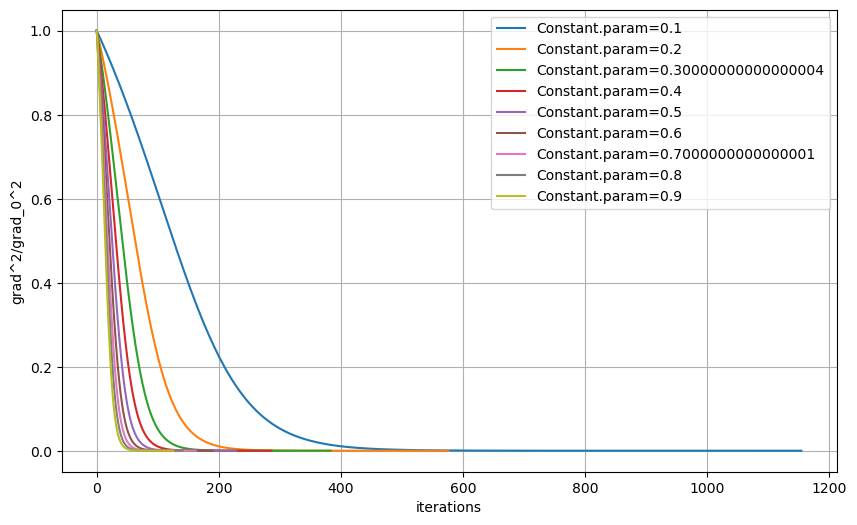

<Figure size 640x480 with 0 Axes>

In [48]:
experiment_4_LogReg()

In [51]:
def experiment_5_quadratic():
  ####Quadratic Newton
  np.random.seed(11)
  k = 500
  n = 20

  diag = np.random.uniform(low=1, high = k, size=n)
  diag[0], diag[-1] = 1, k
  A = diags(diag)
  b = np.random.uniform(low=k, high = 2*k, size=n)

  oracle = oracles.QuadraticOracle(A, b)

  methodsArr = ['Wolfe', 'Armijo', 'Constant']

  methodsIters = [np.arange(0.1,1,0.1),np.arange(0.1,1,0.1),np.arange(0.1,1,0.1)]

  for index, item in enumerate(methodsArr):
    print(item)
    plt.figure(figsize=(10,6))
    for i in methodsIters[index]:
      #print(i)
      _, _, history = optimization.newton(oracle, np.zeros(n)- 1,
                                        line_search_options={'method': item,
                                        'c': i,
                                        'c1': i if item == 'Armijo' else i*0.5,
                                        'c2': i },
                                        trace=True)
      Iters = np.arange(len(history['func']))
      func = history['func']

      plt.plot(Iters, np.log(np.divide(func + np.absolute(np.min(func)),
                                      np.absolute(func[0])) + 1), label='{}.param={}'.format(item,i))
    plt.xlabel('iterations')
    ylabel = 'log((func+abs(min(func))) / abs(func_0))'
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()
    plt.clf()

Wolfe


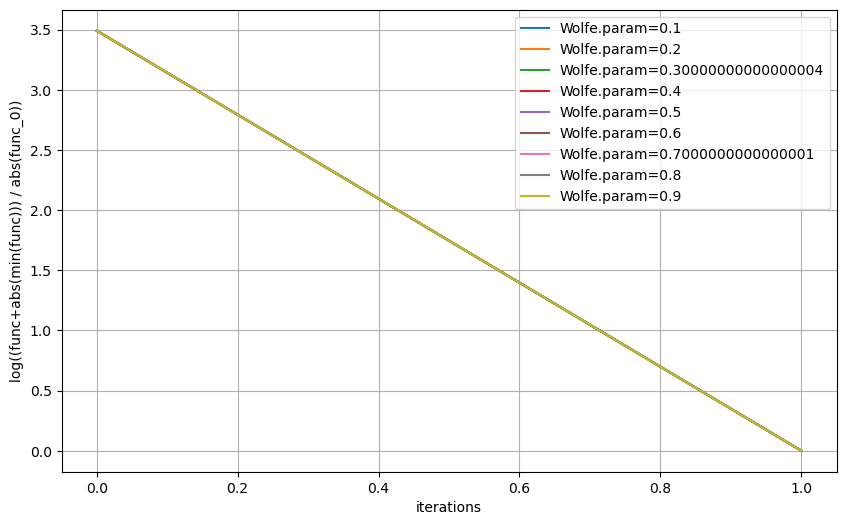

Armijo


<Figure size 640x480 with 0 Axes>

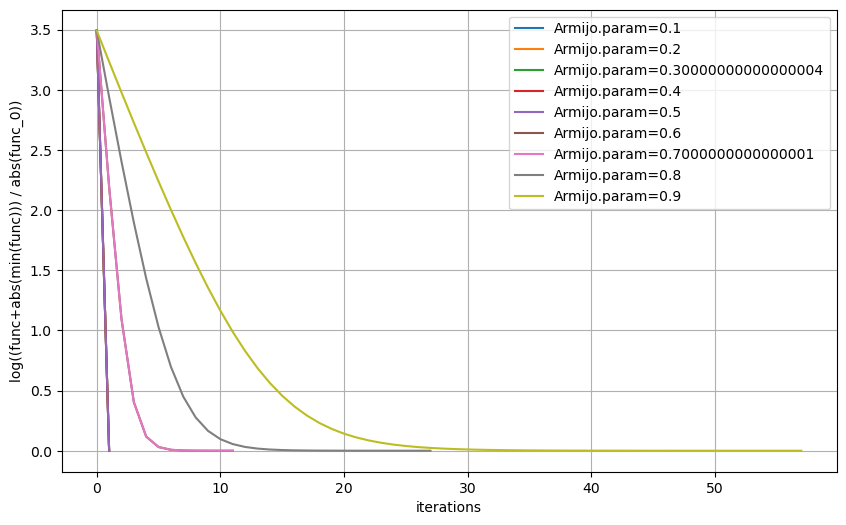

Constant


<Figure size 640x480 with 0 Axes>

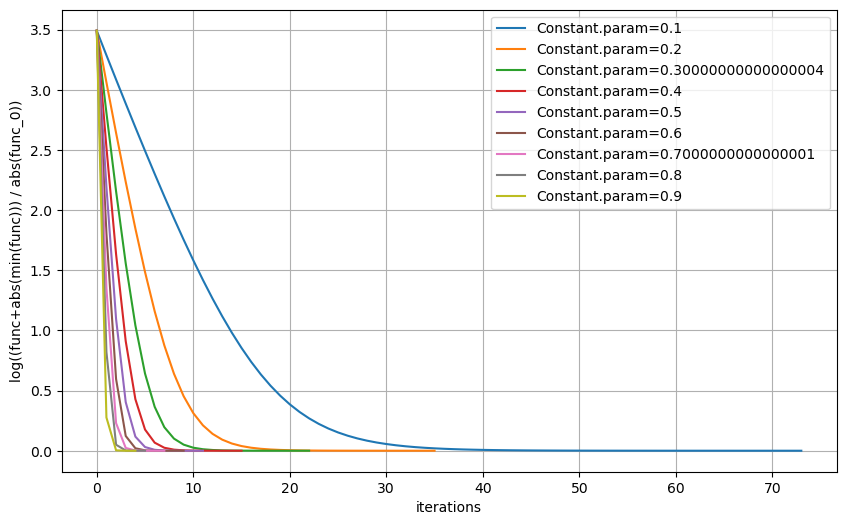

<Figure size 640x480 with 0 Axes>

In [52]:
experiment_5_quadratic()

In [54]:
def experiment_5_LogReg():
  #### LogReg Newton

  np.random.seed(11)
  m = 1000
  n = 20


  A = np.random.uniform(low=-1, high = 1, size=n*m).reshape((m,n))
  b = (2*np.random.randint(2, size=m) - 1)

  oracle = oracles.create_log_reg_oracle(A, b, 1 /m)

  methodsArr = ['Wolfe', 'Armijo', 'Constant']

  methodsIters = [np.arange(0.1,1,0.1),np.arange(0.1,1,0.1),np.arange(0.1,1,0.1)]
######
  for index, item in enumerate(methodsArr):
    print(item)
    plt.figure(figsize=(10,6))
    for i in methodsIters[index]:
      #print(i)
      _, _, history = optimization.newton(oracle, np.zeros(n)- 1,
                                        line_search_options={'method': item,
                                        'c': i,
                                        'c1': i if item == 'Armijo' else i*0.5,
                                        'c2': i },
                                        trace=True)
      Iters = np.arange(len(history['grad_norm']))
      grad = history['grad_norm']

      plt.plot(Iters, np.divide(np.power(grad, 2), grad[0]**2), label='{}.param={}'.format(item,i))

    plt.xlabel('iterations')
    ylabel = 'grad^2/grad_0^2'
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()
    plt.clf()


Wolfe


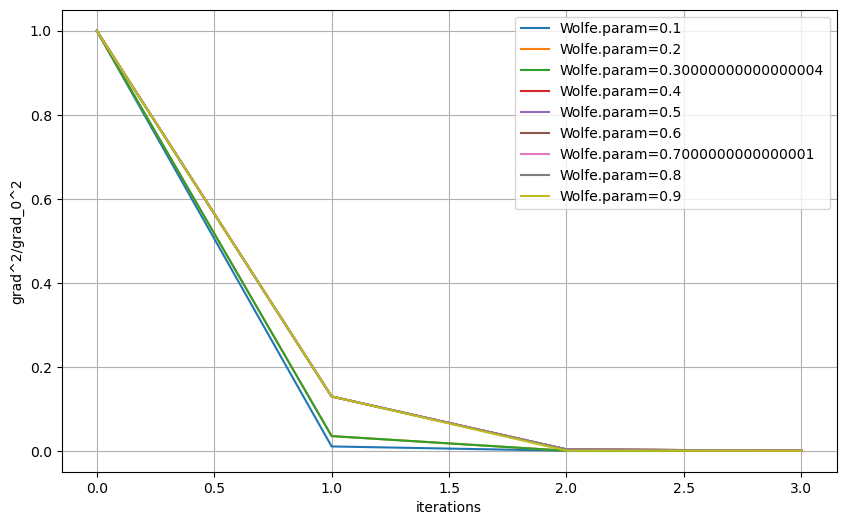

Armijo


<Figure size 640x480 with 0 Axes>

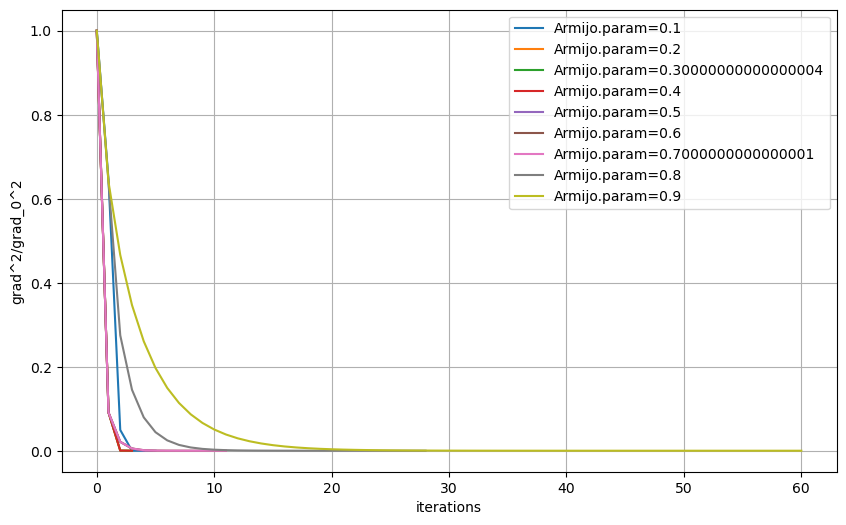

Constant


<Figure size 640x480 with 0 Axes>

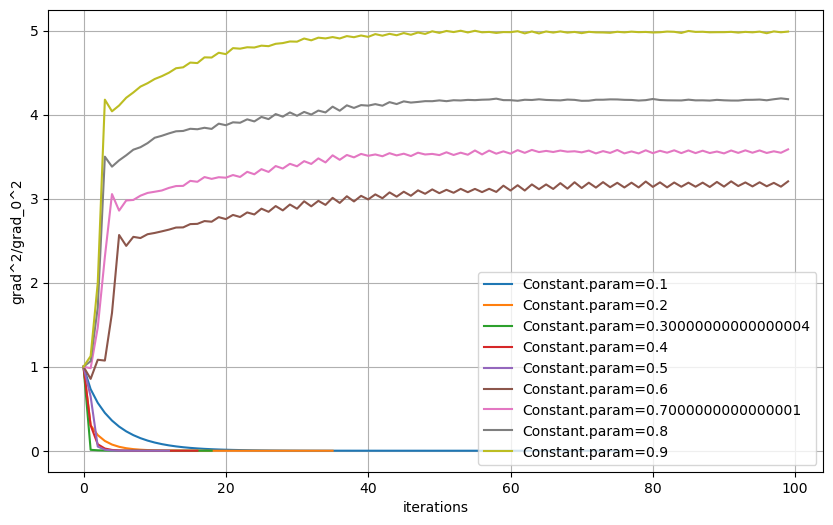

CPU times: total: 9.33 s
Wall time: 2.5 s


<Figure size 640x480 with 0 Axes>

In [55]:
%%time
experiment_5_LogReg()